In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pandas as pd

import numpy as np

In [2]:
df = pd.read_csv('^NSEI.csv')

In [3]:
df.set_index('Date', inplace=True)

In [4]:
df = df.dropna()

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0
...,...,...,...,...,...,...
2020-07-14,10750.849609,10755.650391,10562.900391,10607.349609,10607.349609,532400.0
2020-07-15,10701.000000,10827.450195,10577.750000,10618.200195,10618.200195,715900.0
2020-07-16,10706.200195,10755.299805,10595.200195,10739.950195,10739.950195,694400.0


In [6]:
df.dropna()
df = df.iloc[:,:4]
df.head()

,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805


In [7]:
df

,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805
...,...,...,...,...
2020-07-14,10750.849609,10755.650391,10562.900391,10607.349609
2020-07-15,10701.000000,10827.450195,10577.750000,10618.200195
2020-07-16,10706.200195,10755.299805,10595.200195,10739.950195


In [8]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
# df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)

C:\Users\bnjau\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df = df.dropna()
X = df.iloc[:,:9]
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
y

array([-1, -1, -1, ...,  1,  1, -1])

In [40]:
df

,Open,High,Low,Close,S_10,Corr,Open-Close,Open-Open,Predicted_Signal,Nifty_returns,Startegy_returns
Date,,,,,,,,,,,
2007-10-16,5670.649902,5708.350098,5578.450195,5668.049805,5375.064990,0.909270,0.250000,242.299804,-1,-0.000415,-0.000415
2007-10-17,5658.899902,5658.899902,5107.299805,5559.299805,5409.914990,0.892397,-9.149903,-11.750000,-1,-0.019373,0.019373
2007-10-18,5551.100098,5736.799805,5269.649902,5351.000000,5424.150000,0.712693,-8.199707,-107.799804,-1,-0.038189,0.038189
2007-10-19,5360.350098,5390.850098,5101.750000,5215.299805,5427.094971,0.385088,9.350098,-190.750000,-1,-0.025687,0.025687
2007-10-22,5202.750000,5247.399902,5070.899902,5184.000000,5436.984961,-0.131862,-12.549805,-157.600098,-1,-0.006020,0.006020
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14,10750.849609,10755.650391,10562.900391,10607.349609,10684.970019,0.597937,-51.850586,-101.000000,-1,-0.018249,-0.018249
2020-07-15,10701.000000,10827.450195,10577.750000,10618.200195,10703.785058,0.179844,93.650391,-49.849609,1,0.001022,-0.001022
2020-07-16,10706.200195,10755.299805,10595.200195,10739.950195,10722.610058,-0.093806,88.000000,5.200195,1,0.011401,0.011401


In [41]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
y

array([-1, -1, -1, ...,  1,  1, -1])

In [42]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

model = LogisticRegression()
model = model.fit (X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1
0,Open,[-0.0020275903777626477]
1,High,[0.0003101470373727945]
2,Low,[0.0004631825762537889]
3,Close,[0.0008022691499685761]
4,S_10,[0.00046115121231788347]
5,Corr,[1.846594732316241e-05]
6,Open-Close,[0.00417623647663472]
7,Open-Open,[0.0003905356555628231]
8,Predicted_Signal,[3.23242515917811e-05]


In [43]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

C:\Users\bnjau\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
probability = model.predict_proba(X_test)
print (probability)

[[0.46963445 0.53036555]
 [0.4611251  0.5388749 ]
 [0.49287147 0.50712853]
 ...
 [0.38552541 0.61447459]
 [0.4152996  0.5847004 ]
 [0.37467473 0.62532527]]


In [45]:
predicted = model.predict(X_test)

In [46]:
predicted

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [47]:
print(metrics.confusion_matrix(y_test, predicted))

[[108 329]
 [119 379]]


In [48]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.48      0.25      0.33       437
           1       0.54      0.76      0.63       498

    accuracy                           0.52       935
   macro avg       0.51      0.50      0.48       935
weighted avg       0.51      0.52      0.49       935



In [49]:
print(model.score(X_test,y_test))


0.520855614973262


C:\Users\bnjau\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\bnjau\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bnjau\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

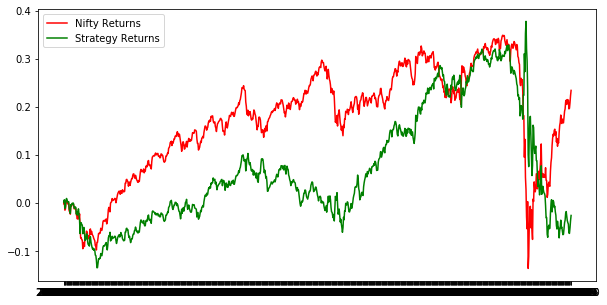

In [50]:
df['Predicted_Signal'] = model.predict(X)
df['Nifty_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])

df['Startegy_returns'] = df['Nifty_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()


In [38]:
df

,Open,High,Low,Close,S_10,Corr,Open-Close,Open-Open,Predicted_Signal,Nifty_returns,Startegy_returns
Date,,,,,,,,,,,
2007-10-15,5428.350098,5682.649902,5419.899902,5670.399902,5315.155029,0.899851,0.100098,-96.949707,1,NaN,NaN
2007-10-16,5670.649902,5708.350098,5578.450195,5668.049805,5375.064990,0.909270,0.250000,242.299804,-1,-0.000415,-0.000415
2007-10-17,5658.899902,5658.899902,5107.299805,5559.299805,5409.914990,0.892397,-9.149903,-11.750000,-1,-0.019373,0.019373
2007-10-18,5551.100098,5736.799805,5269.649902,5351.000000,5424.150000,0.712693,-8.199707,-107.799804,-1,-0.038189,0.038189
2007-10-19,5360.350098,5390.850098,5101.750000,5215.299805,5427.094971,0.385088,9.350098,-190.750000,-1,-0.025687,0.025687
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-14,10750.849609,10755.650391,10562.900391,10607.349609,10684.970019,0.597937,-51.850586,-101.000000,-1,-0.018249,-0.018249
2020-07-15,10701.000000,10827.450195,10577.750000,10618.200195,10703.785058,0.179844,93.650391,-49.849609,1,0.001022,-0.001022
2020-07-16,10706.200195,10755.299805,10595.200195,10739.950195,10722.610058,-0.093806,88.000000,5.200195,1,0.011401,0.011401
